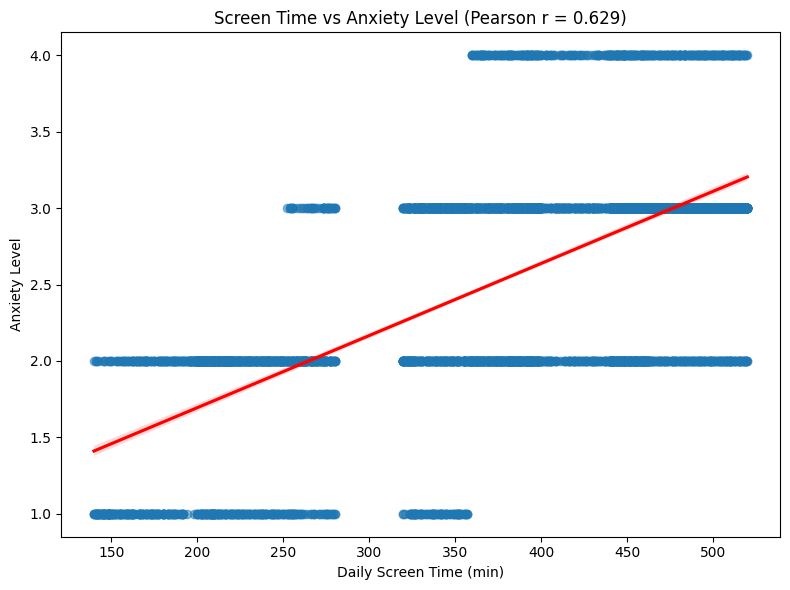

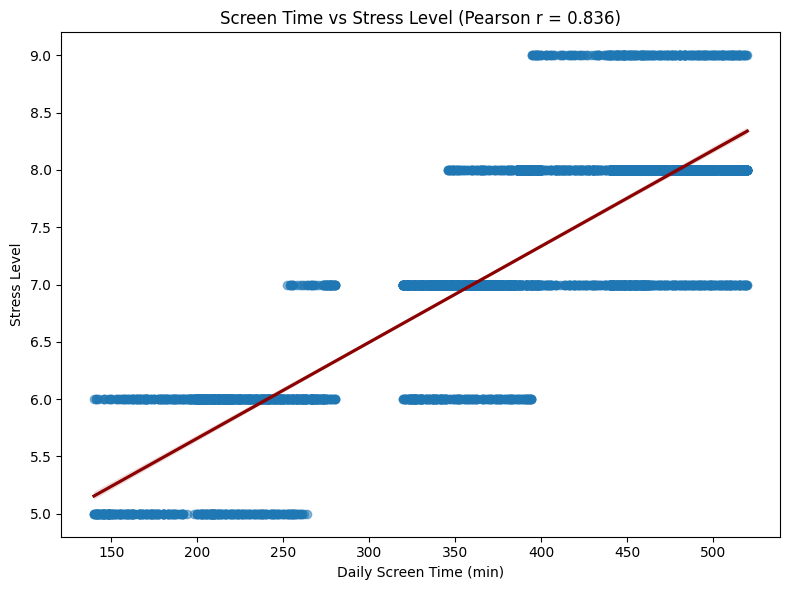

/tmp/ipykernel_47/1247999680.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mood_stats = df.groupby('usage_group')['mood_level'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


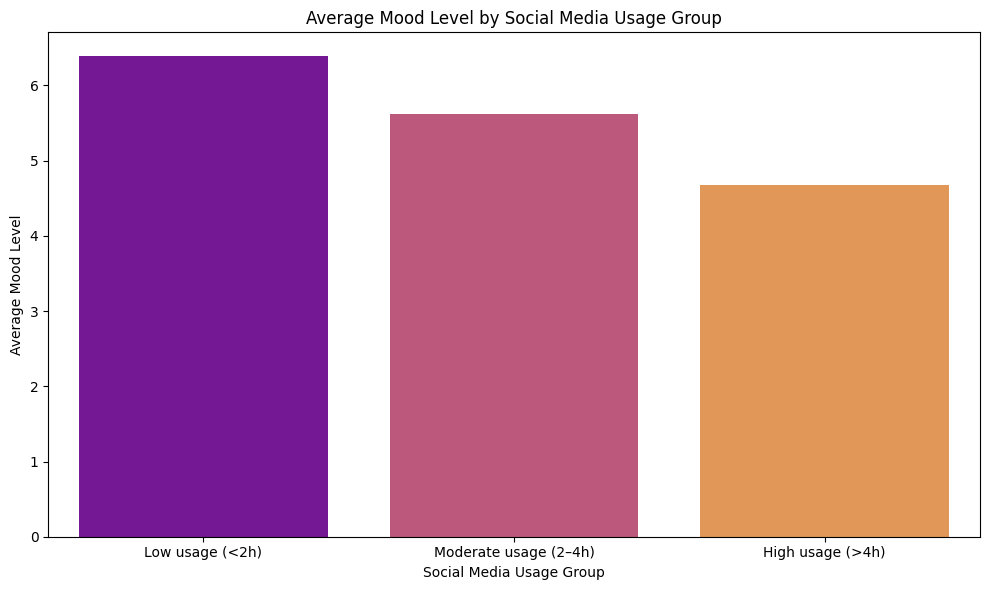

/tmp/ipykernel_47/1247999680.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_stats = df.groupby('screen_time_group')['sleep_hours'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


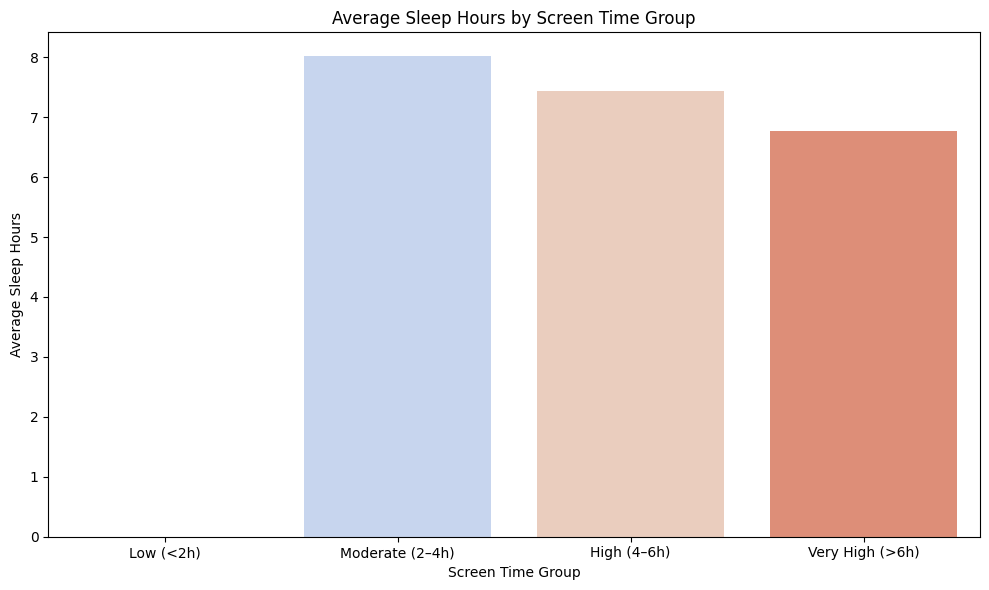

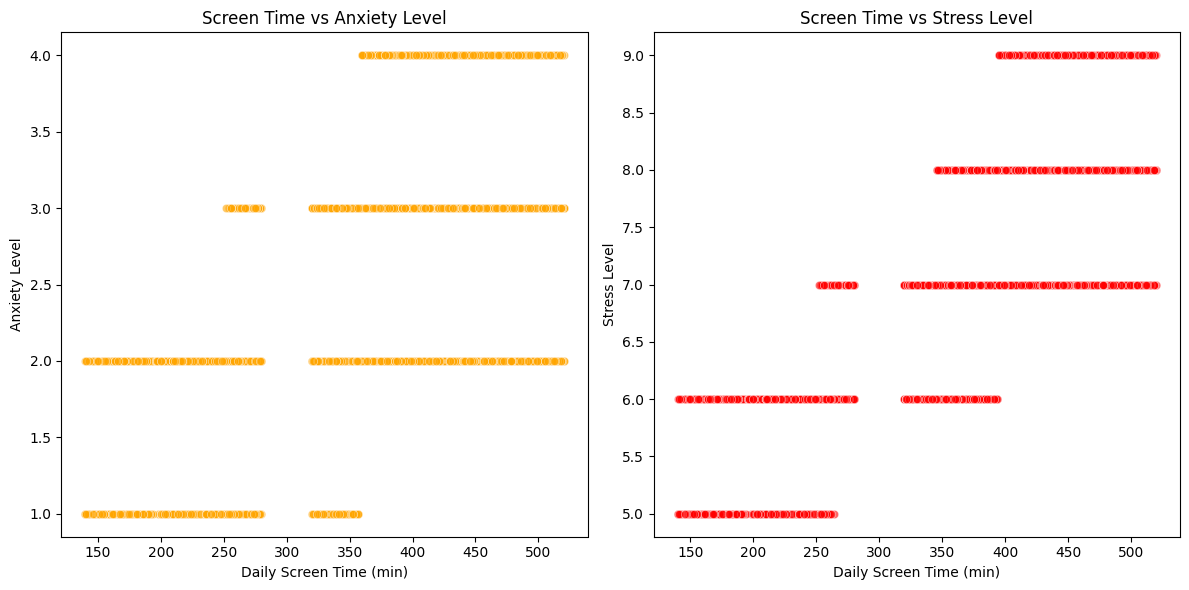

In [2]:
# 1. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder for saving plots
os.makedirs("digital_usage_wellbeing", exist_ok=True)

# 2. Load Dataset

df = pd.read_csv("/kaggle/input/mental-health-social-media-correct/mental_health_social_media_correct.csv")

# 3. Visualization 1:
#    Correlation Between Screen Time and Anxiety/Stress

r_anxiety = df['daily_screen_time_min'].corr(df['anxiety_level'])

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='daily_screen_time_min',
    y='anxiety_level',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.title(f"Screen Time vs Anxiety Level (Pearson r = {r_anxiety:.3f})")
plt.xlabel("Daily Screen Time (min)")
plt.ylabel("Anxiety Level")
plt.tight_layout()
plt.savefig("digital_usage_wellbeing/regression_screen_anxiety.png", dpi=300, bbox_inches='tight')
plt.show()

r_stress = df['daily_screen_time_min'].corr(df['stress_level'])

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='daily_screen_time_min',
    y='stress_level',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'darkred'}
)

plt.title(f"Screen Time vs Stress Level (Pearson r = {r_stress:.3f})")
plt.xlabel("Daily Screen Time (min)")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.savefig("digital_usage_wellbeing/regression_screen_stress.png", dpi=300, bbox_inches='tight')
plt.show()


# 4. Visualization 2:
#    Mood Level by Social Media Usage Group

df['usage_group'] = pd.cut(
    df['social_media_time_min'],
    bins=[0, 120, 240, 10000],
    labels=['Low usage (<2h)', 'Moderate usage (2–4h)', 'High usage (>4h)']
)

mood_stats = df.groupby('usage_group')['mood_level'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=mood_stats,
    x='usage_group',
    y='mood_level',
    palette='plasma'
)

plt.title("Average Mood Level by Social Media Usage Group")
plt.xlabel("Social Media Usage Group")
plt.ylabel("Average Mood Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("digital_usage_wellbeing/mood_by_social_media_usage.png", dpi=300, bbox_inches='tight')
plt.show()

# 5. Visualization 3:
#    Sleep Hours by Screen Time Group

df['screen_time_group'] = pd.cut(
    df['daily_screen_time_min'],
    bins=[0, 120, 240, 360, 10000],
    labels=['Low (<2h)', 'Moderate (2–4h)', 'High (4–6h)', 'Very High (>6h)']
)

sleep_stats = df.groupby('screen_time_group')['sleep_hours'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=sleep_stats,
    x='screen_time_group',
    y='sleep_hours',
    palette='coolwarm'
)

plt.title("Average Sleep Hours by Screen Time Group")
plt.xlabel("Screen Time Group")
plt.ylabel("Average Sleep Hours")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("digital_usage_wellbeing/sleep_by_screen_time.png", dpi=300, bbox_inches='tight')
plt.show()

# 6. Visualization 4:
#    Scatter Plot: Screen Time vs Anxiety & Stress

plt.figure(figsize=(12,6))

# Anxiety
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='daily_screen_time_min',
    y='anxiety_level',
    alpha=0.6,
    color='orange'
)
plt.title("Screen Time vs Anxiety Level")
plt.xlabel("Daily Screen Time (min)")
plt.ylabel("Anxiety Level")

# Stress
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='daily_screen_time_min',
    y='stress_level',
    alpha=0.6,
    color='red'
)
plt.title("Screen Time vs Stress Level")
plt.xlabel("Daily Screen Time (min)")
plt.ylabel("Stress Level")

plt.tight_layout()
plt.savefig("digital_usage_wellbeing/screen_time_vs_anxiety_stress_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

